# 1. Introduction & Problem Statement

## Introduction

Regression is a fundamental machine learning task that involves predicting continuous values based on input features. In this project, we will build a neural network from scratch using Python and NumPy to perform regression on the Boston Housing Dataset. This dataset contains information about housing prices in Boston, with various socioeconomic and structural attributes as input features.

The goal of this project is to gain a deeper understanding of how neural networks function under the hood by implementing all necessary computations (forward pass, backpropagation, weight updates, etc.) manually—without relying on deep learning libraries like TensorFlow or PyTorch.

## Problem Statement
Predicting real estate prices is a common problem in data science and has significant practical applications in the real world. Housing prices are influenced by multiple factors such as crime rate, the number of rooms per dwelling, property tax rate, and accessibility to highways. Given this complexity, a neural network can help model these nonlinear relationships effectively.

In this project, we aim to:

- Preprocess and analyze the Boston Housing Dataset to understand feature importance.
- Implement a neural network from scratch to perform regression.
- Train the model using gradient descent, optimizing weights without external deep learning frameworks.
- Evaluate performance using metrics such as Mean Squared Error (MSE) and R² score.
- Experiment with different architectures (number of layers, neurons, activation functions) to improve model performance.

## Dataset Overview
The Boston Housing Dataset consists of 506 samples and 13 features that describe various aspects of homes and their surrounding environment in Boston, Massachusetts. The target variable is MEDV (Median Value of Owner-Occupied Homes in $1000s).

Features in the Dataset:
1. CRIM - Per capita crime rate by town
2. ZN - Proportion of residential land zoned for large lots
3. INDUS - Proportion of non-retail business acres per town
4. CHAS - Charles River dummy variable (1 if tract bounds river, 0 otherwise)
5. NOX - Nitrogen oxide concentration (parts per 10 million)
6. RM - Average number of rooms per dwelling
7. AGE - Proportion of owner-occupied units built before 1940
8. DIS - Weighted distance to five employment centers
9. RAD - Accessibility to radial highways
10. TAX - Property tax rate per $10,000
    
12. PTRATIO - Pupil-teacher ratio by town
13. B - 1000(Bk - 0.63)² (where Bk is the proportion of Black residents)
14. LSTAT - Percentage of lower status population
15. MEDV (Target Variable) - Median home value in $1000s

## Why Use a Neural Network for Regression?
Unlike traditional linear regression models, neural networks can:

✅ Learn complex, nonlinear relationships between features and target variables.

✅ Adjust weights dynamically through backpropagation and gradient descent.

✅ Be optimized with activation functions, loss functions, and different network architectures.

In the next sections, we will:
- Load and preprocess the dataset
- Implement a feedforward neural network with backpropagation
- Train the model and optimize performance
- Analyze results and suggest improvements

# 2. Setup & Import Libraries

Import necessary Python libraries for data processing, visualization, and modeling.

In [1]:
# Basic Libraries
import pandas as pd
import numpy as np
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# 3. Load Data
Load datasets and display the first few rows to understand the structure.

In [2]:
# Load Dataset
df = pd.read_csv("/kaggle/input/boston-housing-dataset/BostonHousing.csv")
print(df)

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  medv  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  3

In [3]:
# Quick Overview
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# 4. Data Preprocessing & Cleaning
Handle missing values, duplicates, and data type conversions.

Perform feature engineering if necessary.

## 4.1 Missing Values

In [6]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Only display columns with missing values

# Display missing values
if not missing_values.empty:
    print("Missing Values in Each Column:")
    print(missing_values)
else:
    print("No missing values found.")

Missing Values in Each Column:
rm    5
dtype: int64


In [7]:
# Fill missing values with the median of each column
df.fillna(df.median(), inplace=True)

# Verify if missing values are handled
print("Missing values after handling:", df.isnull().sum().sum())  # Should be 0

Missing values after handling: 0


## 4.2 Duplicate Rows

In [8]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

# Display duplicate rows (if any)
if not duplicate_rows.empty:
    display(duplicate_rows)

# Drop duplicates if needed
df = df.drop_duplicates()
print(f"New dataset shape after removing duplicates: {df.shape}")

Number of duplicate rows: 0
New dataset shape after removing duplicates: (506, 14)


# 5. Exploratory Data Analysis (EDA)
EDA helps you understand patterns, relationships, and anomalies in the dataset before modeling. The key steps involve

### Key Takeaways from EDA
- Identify important features for modeling.
- Decide if transformations (log, standardization) are needed.
- Handle outliers appropriately.
- Drop redundant features if necessary.

## 5.1 Understanding Feature Distributions
Check the spread of numerical features using histograms and boxplots.

✅ Why?
- Detects skewness and outliers.
- Helps decide if transformations (like log scaling) are needed.

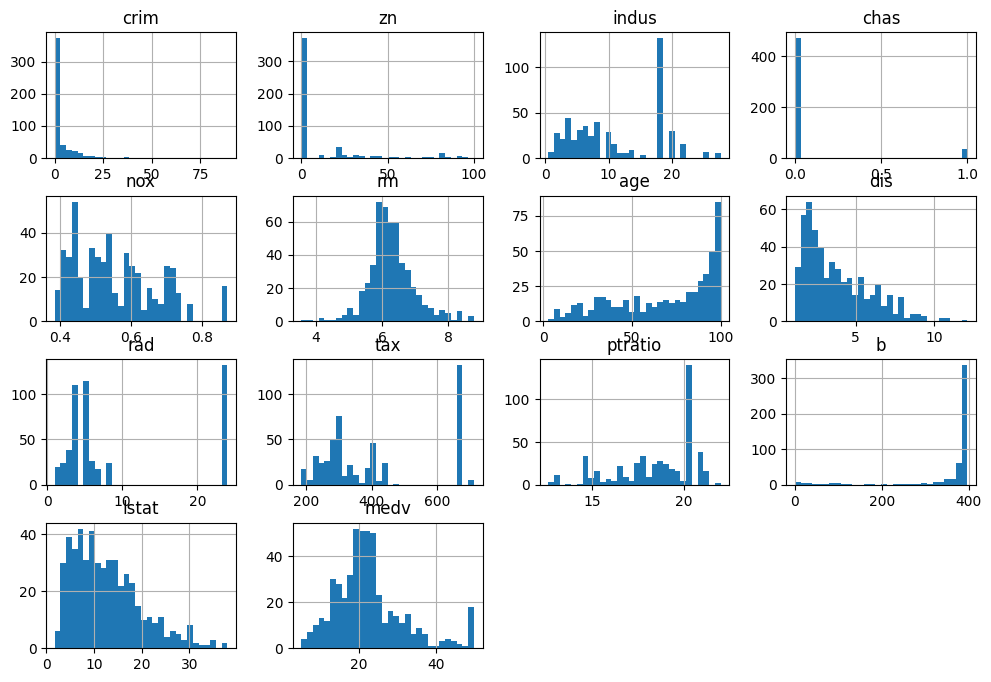

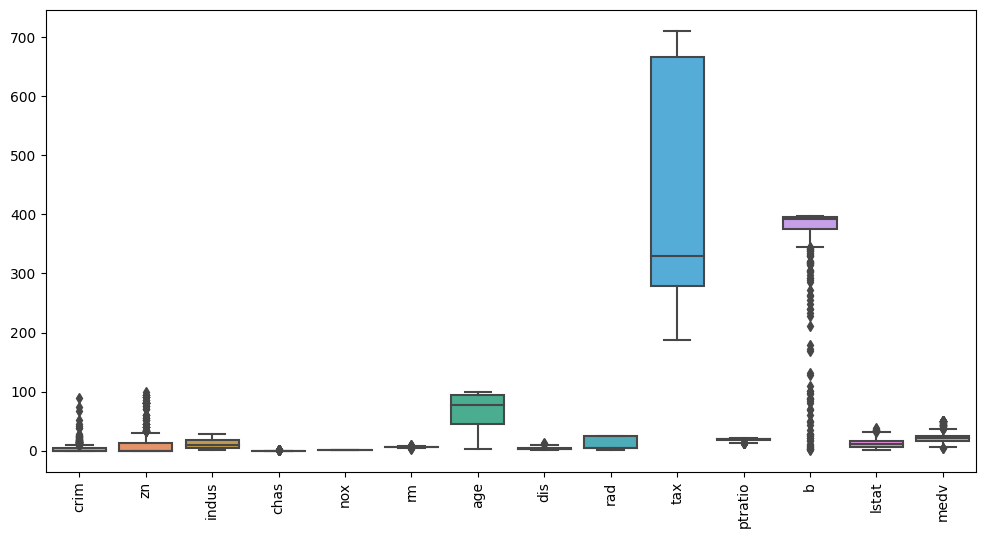

In [9]:
# Histograms for all numerical features
df.hist(figsize=(12, 8), bins=30)
plt.show()

# Boxplots to check for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

## 5.2 Checking Correlations
Identify relationships between variables, especially between features and the target variable (MEDV).

✅ Why?
- Shows multicollinearity (strong correlations between independent variables).
- Highlights which features impact MEDV the most.

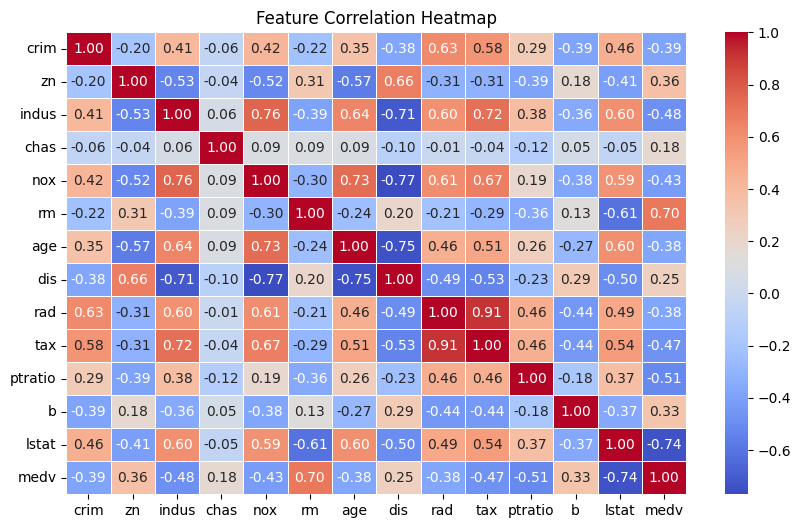

In [10]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

## 5.3 Pairplot for Key Features
Visualize relationships between MEDV and a few important features.

✅ Why?
- Detects trends (linear, nonlinear, clusters).
- Identifies potential feature interactions.

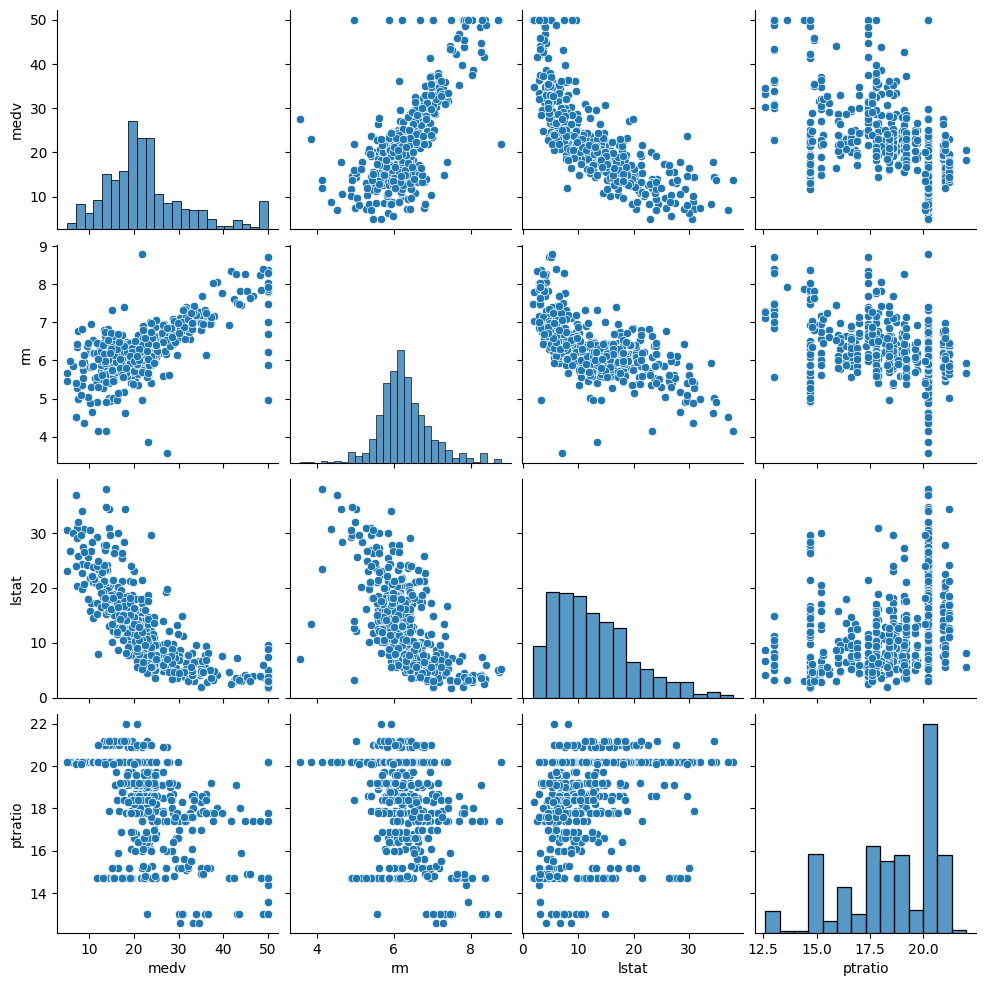

In [11]:
# Select top correlated features
important_features = ["medv", "rm", "lstat", "ptratio"]

sns.pairplot(df[important_features])
plt.show()

## 5.4 Outlier Detection
Use boxplots and scatter plots to check for extreme values.

✅ Why?

Identifies outliers that might need handling (removal, transformation, or winsorization).

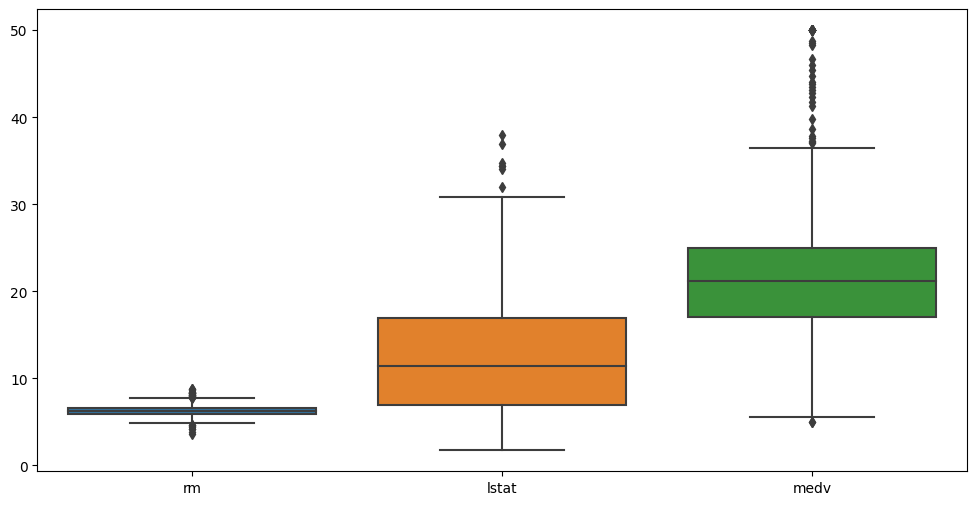

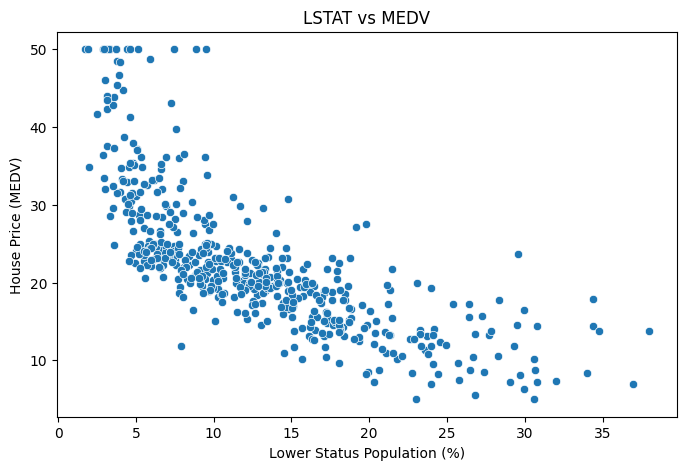

In [12]:
# Boxplot for key numerical features
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[["rm", "lstat", "medv"]])
plt.show()

# Scatter plot to detect unusual data points
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["lstat"], y=df["medv"])
plt.xlabel("Lower Status Population (%)")
plt.ylabel("House Price (MEDV)")
plt.title("LSTAT vs MEDV")
plt.show()

## 5.5 Feature-Target Relationships

Investigate how specific features affect MEDV.

✅ Why?

Confirms if a feature is a strong predictor of house prices.
Helps with feature selection.

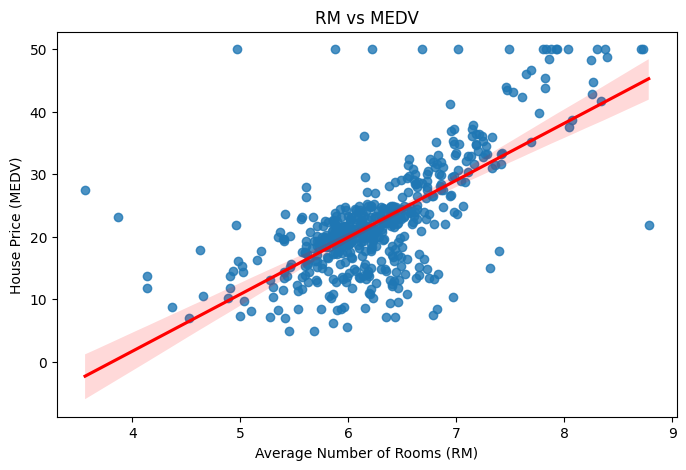

In [13]:
# RM (average number of rooms per dwelling) vs. MEDV
plt.figure(figsize=(8, 5))
sns.regplot(x=df["rm"], y=df["medv"], line_kws={"color": "red"})
plt.xlabel("Average Number of Rooms (RM)")
plt.ylabel("House Price (MEDV)")
plt.title("RM vs MEDV")
plt.show()

# 6. Feature Selection & Engineering
Select important features and create new ones if necessary.

In [14]:
# Feature Selection
selected_features = ['lstat', 'rm', 'ptratio', 'indus', 'tax']
X = df[selected_features]
y = df['medv']

# 7. Data Splitting & Normalization

Split data into training and testing sets.

Normalize if required.

## 🔹 fit_transform vs transform

1️⃣ fit_transform(X_train)

- fit step: Computes the mean and standard deviation from X_train.
- transform step: Uses these computed values to standardize X_train.

2️⃣ transform(X_test)

- Uses the same mean and standard deviation (computed from X_train) to standardize X_test.
- Does not recompute new statistics from X_test to ensure consistency.

In [15]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
print("Training set size:", X_train_scaled.shape, y_train.shape)
print("Testing set size:", X_test_scaled.shape, y_test.shape)

Training set size: (404, 5) (404,)
Testing set size: (102, 5) (102,)


In [17]:
# Convert to NumPy
X_train_np = X_train_scaled  # Already scaled
y_train_np = y_train.to_numpy().reshape(-1, 1)  # Convert target & reshape

X_test_np = X_test_scaled  # Already scaled
y_test_np = y_test.to_numpy().reshape(-1, 1)  # Convert target & reshape

# 8. Define Helper Functions

In [18]:
# ReLU Activation Function
def relu(Z):
    return np.maximum(0, Z)

# Mean Squared Error (MSE) Loss Function
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [19]:
def my_dense(A_in, W, b, g=None):
    """
    Custom dense layer for regression.
    
    Args:
      A_in (ndarray): Input data (m, n)
      W    (ndarray): Weight matrix (n, j)
      b    (ndarray): Bias vector (1, j)
      g    (function, optional): Activation function (None for linear output)

    Returns:
      A_out (ndarray): Output after applying activation
    """
    Z = np.matmul(A_in, W) + b
    return Z if g is None else g(Z)  # No activation for output layer

# 9. Initialize Parameters

In [20]:
n_features = X_train_np.shape[1]  # Number of input features
n_hidden = 3  # Hidden layer size
n_output = 1  # Single output neuron for regression

# Initialize weights and biases
W1 = np.random.randn(n_features, n_hidden) * 0.01  # Small random values
b1 = np.zeros((1, n_hidden))

W2 = np.random.randn(n_hidden, n_output) * 0.01
b2 = np.zeros((1, n_output))

# 10. Forward Pass (Single Inference) 

In [21]:
def my_sequential(X, W1, b1, W2, b2):
    
    # Hidden Layer (ReLU Activation)
    A1 = my_dense(X, W1, b1, relu)
    
    # Output Layer (No activation, linear output)
    A2 = my_dense(A1, W2, b2)
    return(A2)

In [22]:
y_train_pred  = my_sequential(X_train_np, W1, b1, W2, b2)
y_train_pred .shape

# Check dimensions
print(y_train_pred .shape)  # Should be (m, 1)

# Compute initial loss
loss = mse_loss(y_train_np, y_train_pred )
print(f"Training MSE Loss: {loss}")

(404, 1)
Training MSE Loss: 606.5421126590023


In [23]:
# Forward pass on test data
y_test_pred = my_sequential(X_test_np, W1, b1, W2, b2)

test_loss = mse_loss(y_test_np, y_test_pred)
print(f"Test MSE Loss: {test_loss}")

Test MSE Loss: 535.068979577572


# 9. Evaluate the Model

In [24]:
# Loss
train_loss = mse_loss(y_train_np, y_train_pred)
test_loss = mse_loss(y_test_np, y_test_pred)

print(f"Train MSE: {train_loss:.4f}")
print(f"Test MSE: {test_loss:.4f}")

Train MSE: 606.5421
Test MSE: 535.0690


In [25]:
r2_train = r2_score(y_train_np, y_train_pred)
r2_test = r2_score(y_test_np, y_test_pred)

print(f"Train R² Score: {r2_train:.4f}")
print(f"Test R² Score: {r2_test:.4f}")

Train R² Score: -5.9819
Test R² Score: -6.2964


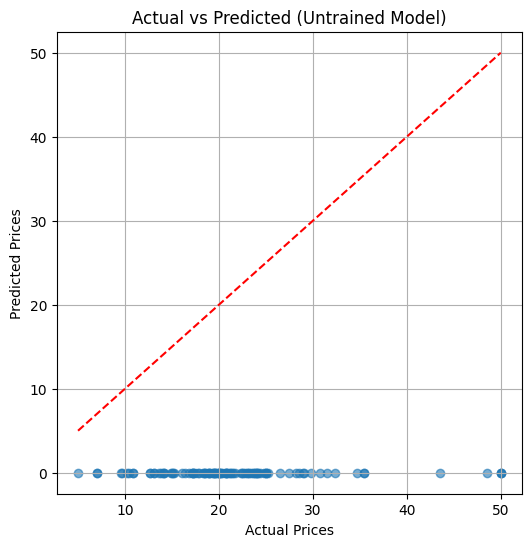

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test_np, y_test_pred, alpha=0.6)
plt.plot([y_test_np.min(), y_test_np.max()], [y_test_np.min(), y_test_np.max()], 'r--')  # Ideal line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted (Untrained Model)")
plt.grid(True)
plt.show()

# 10. Implementation using backpropagation

In [27]:
# Hyperparameters
epochs = 1000
learning_rate = 0.01

# Track losses
train_losses = []
test_losses = []

for epoch in range(epochs):
    # ===== Forward Pass =====
    Z1 = np.dot(X_train_np, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    y_pred_train = Z2

    # ===== Loss Computation =====
    loss_train = mse_loss(y_train_np, y_pred_train)

    # ===== Backpropagation =====
    # Output layer gradients
    dZ2 = (y_pred_train - y_train_np)  # (m,1)
    dW2 = np.dot(A1.T, dZ2) / X_train_np.shape[0]
    db2 = np.sum(dZ2, axis=0, keepdims=True) / X_train_np.shape[0]

    # Hidden layer gradients
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * (Z1 > 0)  # derivative of ReLU
    dW1 = np.dot(X_train_np.T, dZ1) / X_train_np.shape[0]
    db1 = np.sum(dZ1, axis=0, keepdims=True) / X_train_np.shape[0]

    # ===== Update weights and biases =====
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1

    # ===== Test Prediction & Loss =====
    A1_test = relu(np.dot(X_test_np, W1) + b1)
    y_pred_test = np.dot(A1_test, W2) + b2
    loss_test = mse_loss(y_test_np, y_pred_test)

    train_losses.append(loss_train)
    test_losses.append(loss_test)

    # Print every 100 epochs
    if (epoch+1) % 100 == 0:
        print(f"Epoch {epoch+1}/{epochs} - Train Loss: {loss_train:.4f} | Test Loss: {loss_test:.4f}")


Epoch 100/1000 - Train Loss: 24.3466 | Test Loss: 25.6674
Epoch 200/1000 - Train Loss: 22.2455 | Test Loss: 22.8191
Epoch 300/1000 - Train Loss: 21.8469 | Test Loss: 21.9710
Epoch 400/1000 - Train Loss: 21.6162 | Test Loss: 21.3839
Epoch 500/1000 - Train Loss: 21.1971 | Test Loss: 20.9657
Epoch 600/1000 - Train Loss: 20.5273 | Test Loss: 19.7208
Epoch 700/1000 - Train Loss: 19.9791 | Test Loss: 18.8439
Epoch 800/1000 - Train Loss: 19.4344 | Test Loss: 18.0887
Epoch 900/1000 - Train Loss: 18.8845 | Test Loss: 17.6766
Epoch 1000/1000 - Train Loss: 18.7434 | Test Loss: 17.4324


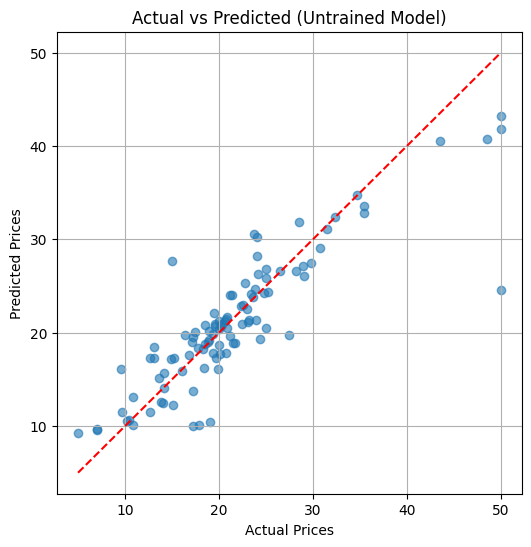

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test_np, y_pred_test, alpha=0.6)
plt.plot([y_test_np.min(), y_test_np.max()], [y_test_np.min(), y_test_np.max()], 'r--')  # Ideal line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted (Untrained Model)")
plt.grid(True)
plt.show()

In [29]:
# Loss
train_loss = mse_loss(y_train_np, y_pred_train)
test_loss = mse_loss(y_test_np, y_pred_test)

print(f"Train MSE: {train_loss:.4f}")
print(f"Test MSE: {test_loss:.4f}")

r2_train = r2_score(y_train_np, y_train_pred)
r2_test = r2_score(y_test_np, y_pred_test)

print(f"Train R² Score: {r2_train:.4f}")
print(f"Test R² Score: {r2_test:.4f}")

Train MSE: 18.7434
Test MSE: 17.4324
Train R² Score: -5.9819
Test R² Score: 0.7623
